For this assignment we will emphasize the bootstrapping concept, of taking a sample and repeatedly sampling with and without replacement. We are going to analyze the mean of applications received to 777 colleges and universities. This data was received by the 1995 US and World report. 

I will first download the necessary dependencies in order to begin this assesment. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 

url = "https://raw.githubusercontent.com/selva86/datasets/master/College.csv"
College = pd.read_csv(url)
print(College.shape)
College.head()

(777, 18)


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Now after our initial data exploration, we can now dive in a bit. In order to demonstrate the capabilities of bootstrapping, I will calculate the mean of all the apps recieved per college and store it in a variable "original_mean". Then in order to do the bootstrap, I will create an empty list called "boots". Then we will sample the mean 1000 different times and each time, the new mean will be added to the list until we have 1000 means on that list. When we do the resampling, we will resample WITH replacement to emphasize real world phenomenas in data sampling. 

In [2]:
original_mean = College["Apps"].mean()
print("Original Mean:", original_mean)

Original Mean: 3001.6383526383524


In [3]:
np.random.seed(1)
start = time.time()

boots = []

for _ in range(1000):
    sample = np.random.choice(College["Apps"], 777, replace=True)
    boots.append(sample.mean())
    
elapsed = time.time() - start
print("Time difference:", elapsed, "seconds")

Time difference: 0.10974717140197754 seconds


We see that it took about 11 seconds for the boot sampling to run. We now have 1000 means of 777 colleges each. This data has its own distribution which we will plot and also utilize to make inferences, so what we will do, we will apply a confidence interval of about 80% on the mean to come up with a range from our bootstrap distribution. We will use the quantile method as well as the standard deviation method. 

In [4]:
boots = np.array(boots)
ci_80 = np.quantile(boots, [.10, .90])
boots_sd = np.std(boots)
ci_80_2 = original_mean + 2*np.array([-boots_sd, boots_sd])
print("quantile version", ci_80)
print("standard deviation version", ci_80_2)

quantile version [2816.98455598 3181.3029601 ]
standard deviation version [2714.88650362 3288.39020165]


With 80% of confidence, I can safely say that the mean falls between 2,817 and 3,181 apps if we are using the quantile version. If we are using the standard deviation method, then our interval is btween 2,715 and 3,288. Similar ranges all across the board. 

Now for the second part, we are going to use different seeds to see if there is a huge deviation in the calculations. 

In [5]:
np.random.seed(2)


boots2 = []

for _ in range(1000):
    sample = np.random.choice(College["Apps"], 777, replace=True)
    boots2.append(sample.mean())
    
boots2 = np.array(boots2)
ci_80 = np.quantile(boots2, [.10, .90])
boots_sd2 = np.std(boots2)
ci_80_2 = original_mean + 2*np.array([-boots_sd2, boots_sd2])
print("quantile version", ci_80)
print("standard deviation version", ci_80_2)

quantile version [2818.96898327 3176.04929215]
standard deviation version [2724.53716298 3278.7395423 ]


In [6]:
np.random.seed(3)

boots3 = [] 

for _ in range(1000):
    sample = np.random.choice(College["Apps"], 777, replace=True)
    boots3.append(sample.mean())
    
boots3 = np.array(boots3)
ci_80 = np.quantile(boots3, [.10, .90])
boots_sd3 = np.std(boots3)
ci_80_2 = original_mean + 2*np.array([-boots_sd3, boots_sd3])
print("quantile version", ci_80)
print("standard deviation version", ci_80_2)

quantile version [2819.66576577 3185.04015444]
standard deviation version [2717.56600976 3285.71069552]


As we see, even with the different seeds, our estimates do not deviate much which makes us feel good as we can tell our stakeholders that the general mean is anywhere between 2700 to 3200 apps. Changing the seed does not seem to drastically change our calculations. Also, most importantly, they don't seem to deviate from the initial "original mean" stored in orignal_mean.

There is one last thing we can look at. We can now check if, maybe, changing the amount of bootstrap samples from 1000 to 5000 will change anything. We will even go as far as reusing seed numbers. 

In [7]:
np.random.seed(1)

boots = [] 

for _ in range(5000):
    sample = np.random.choice(College["Apps"], College["Apps"].shape[0], replace=True)
    boots.append(sample.mean())

boots = np.array(boots) 
ci_80 = np.quantile(boots, [.10, .90])
boots_sd = np.std(boots)
ci_80_2 = original_mean + 2*np.array([-boots_sd, boots_sd])
print("quantile version", ci_80)
print("standard deviation version", ci_80_2)

quantile version [2823.96074646 3181.81003861]
standard deviation version [2720.38613116 3282.89057412]


In [8]:
np.random.seed(2)  

boots2 = []  

for _ in range(5000):
    sample = np.random.choice(College["Apps"], College["Apps"].shape[0], replace=True)
    boots2.append(sample.mean())

boots2 = np.array(boots2)
ci_80 = np.quantile(boots2, [.10, .90])  
boots2_sd = np.std(boots2)
ci_80_2 = original_mean + 2*np.array([-boots2_sd, boots_sd])
print("quantile version", ci_80)
print("standard deviation version", ci_80_2)

quantile version [2825.81325611 3180.46370656]
standard deviation version [2726.3121749  3282.89057412]


In [9]:
np.random.seed(3)

boots3 = [] 

for _ in range(5000):
    sample = np.random.choice(College["Apps"], College["Apps"].shape[0], replace=True)
    boots3.append(sample.mean())

boots3 = np.array(boots3)
ci_80 = np.quantile(boots3, [.10, .90])
boots3_sd = np.std(boots3)
ci_80_2 = original_mean + 2*np.array([-boots3_sd, boots3_sd])
print("quantile version", ci_80)
print("standard deviation version", ci_80_2)

quantile version [2821.97863578 3180.40810811]
standard deviation version [2720.7578076  3282.51889768]


Again, nothing seems to deviate much regardless of the bootstrapping sample or the seed that was set. This shows that our calculation is very robust, in other words, it is very consistent. 

For our last analysis, we are going to analyze the average amount of applications between private and public institutions. For this we will create null and alternative hypothesis to test out. Our null hypothesis that private schools receive just as many applications from public schools, if not, more. The alternate hypothesis is that public schools recieve, on average, more applications thatn private schools. We will once again use a resampling distribution, but this time WITH replacement to accentuate the randomness of the schools recieving apps for our null distribution. I will plot out the distribution in a histogram and plot the line of the original difference in means on the histogram to see if a metric similar to that or more extreme could come from our null distribution. Visually, this will tell us whether we can reject or not reject the null hypothesis. 

In [10]:
CollegeApps_Mean = College.groupby("Private")["Apps"].mean()
CollegeApps_Mean

Private
No     5729.919811
Yes    1977.929204
Name: Apps, dtype: float64

In [11]:
CollegeDifferenceOriginal = CollegeApps_Mean.iloc[1] - CollegeApps_Mean.iloc[0]
CollegeDifferenceOriginal

np.float64(-3751.990607780932)

In [12]:
NewPrivate = np.random.choice(College["Private"], College["Private"].shape[0], replace=False)

NewCollege = pd.DataFrame({"Apps": College["Apps"], "Private": NewPrivate})

np.random.seed(400)

SampleNoise = [] 

mine3 = time.time()
for _ in range(10000):
    NewPrivate = np.random.choice(College["Private"], College["Private"].shape[0], replace=False)
    NewCollege = pd.DataFrame({"Apps": College["Apps"], "Private": NewPrivate})
    CollegeApps_Mean = NewCollege.groupby("Private")["Apps"].mean()
    CollegeDifference = CollegeApps_Mean.iloc[1] - CollegeApps_Mean.iloc[0] 
    SampleNoise.append(CollegeDifference)


mine4 = time.time() 

mine4 - mine3  

11.28327989578247

Now it is time to plot my distribtion and set the probability or the "p-value". We will set it at 5%. Notice that this took me about 10.6 seconds to run. 

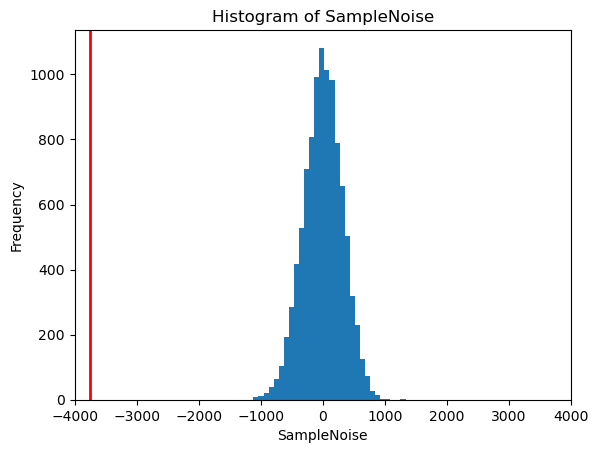

In [13]:
plt.figure()
plt.hist(SampleNoise, bins=30)
plt.xlim(-4000, 4000)
plt.axvline(CollegeDifferenceOriginal, linestyle = '-', linewidth = 2, color = "red")
plt.xlabel("SampleNoise")
plt.ylabel("Frequency")
plt.title("Histogram of SampleNoise") 
plt.show()

Looking at our chart, the p-value is not even in the distribution, it is way to the left indicating a negative value. Since we are subtracting the mean apps of public schools from the mean app of private school from the original data, this resulted in a large negative value. Even if we had done the other way, subtracting the mean value of private from the mean value of public, it would still be outside our distribution. Visually, this tells us to reject the null hypothesis. Before that, we will do one last calculation to see it in pure numbers. 

In [14]:
Lessthanoriginal = SampleNoise < CollegeDifferenceOriginal
print(sum(Lessthanoriginal)/10000)

0.0


This once again shows that the p-value is much less than the 5% threshold that we had set. We can now firmly reject the null hypothesis. 